 # <div class="alert alert-danger" > Inferring </div>

 I like to think 
of inferring tasks where the model takes a text as input and 
performs some kind of analysis. So this could be extracting labels, 
extracting names, kind of understanding the 
sentiment of a text, that kind of thing. 

So if you want to extract a sentiment, positive or negative, 
of a piece of text, in the traditional 
machine learning workflow, you'd have to collect the label data set, train 
a model, figure out how to deploy the model somewhere in 
the cloud and make inferences. And that could work pretty well, but 
it was, you know, just a lot of work to 
go through that process. And also for every task, such 
as sentiment versus extracting names versus 
something else, you have to train and 
deploy a separate model. 

One of the really nice 
things about large language model is that for 
many tasks like these, you can just write a 
prompt and have it start generating results pretty 
much right away. And that gives tremendous speed in terms 
of application development. And you can also just use one model, one 
API to do many different tasks rather than 
needing to figure out how to train and deploy a lot of 
different models. 


### <div class="alert alert-success" >  Setup
    
And so with that, let's jump 
into the code to see how you can take advantage of this. So here's 
our usual starter code. I'll just run that.    

In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [2]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

### <div class="alert alert-info" > Product review text
    
And the most fitting example I'm going to use is a review for a lamp.    

In [3]:
lamp_review = """
Needed a nice lamp for my bedroom, and this one had \
additional storage and not too high of a price point. \
Got it fast.  The string to our lamp broke during the \
transit and the company happily sent over a new one. \
Came within a few days as well. It was easy to put \
together.  I had a missing part, so I contacted their \
support and they very quickly got me the missing piece! \
Lumina seems to me to be a great company that cares \
about their customers and products!!
"""

### <div class="alert alert-success" >  Sentiment (positive/negative)

So, let me write a prompt to classify the sentiment of this. 
And if I want the system to tell me, you know, what is the sentiment. 
I can just write (with the usual delimiter ):


In [4]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Review text: '''{lamp_review}'''
"""
# response = get_completion(prompt)
# print(response)

Let's run that. 

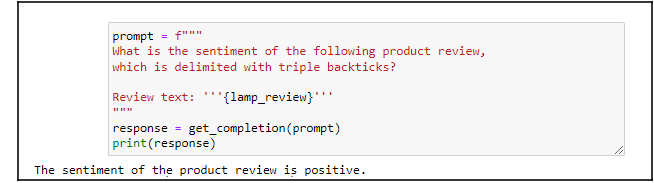

And this says, `The sentiment of the product review is positive.`, which is actually, seems pretty right. This lamp isn't perfect, but this customer seems pretty happy. Seems to be a great company that cares about the customers and products. I 
think positive sentiment seems to be the right answer.

Now this prints out the entire sentence, `The sentiment of the product review is positive.`If you wanted to give a more concise response to make it easier for post-processing, I can take this prompt and add another instruction to give you answers 
to a single word, either positive or negative.

In [5]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Give your answer as a single word, either "positive" \
or "negative".

Review text: '''{lamp_review}'''
"""
# response = get_completion(prompt)
# print(response)

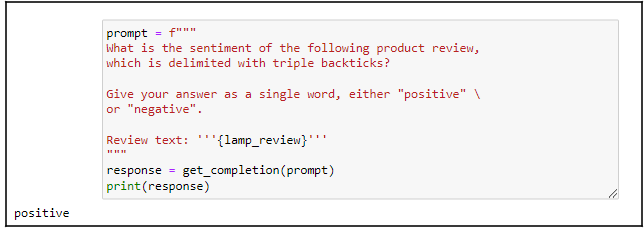

So it just prints out positive like this, which makes it easier for a piece of text to take this output and process it and do something with it. 

### <div class="alert alert-success" >  Identify types of emotions
    
Let's look at another prompt, again still using the lamp review. 
Here, The prompt says:     

In [6]:
prompt = f"""
Identify a list of emotions that the writer of the \
following review is expressing. Include no more than \
five items in the list. Format your answer as a list of \
lower-case words separated by commas.

Review text: '''{lamp_review}'''
"""
# response = get_completion(prompt)
# print(response)

After running the code:

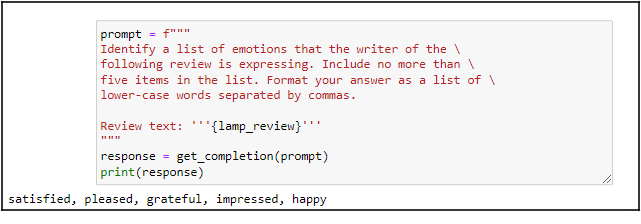

So, large language models are pretty good at extracting 
specific things out of a piece of text. In this case, we're 
expressing the emotions and this could be useful for 
understanding how your customers think about 
a particular product. 

### <div class="alert alert-success" >  Identify anger
    
For a lot of customer support organizations, 
it's important to understand if a particular user is extremely upset. 
So, you might have a different classification problem like 
this, "Is the writer of the following 
review expressing anger?". Because if 
someone is really angry, it might merit paying extra 
attention to have a customer review, to have customer support or 
customer success, reach out to figure what's going on 
and make things right for the customer.    

In [7]:
prompt = f"""
Is the writer of the following review expressing anger?\
The review is delimited with triple backticks. \
Give your answer as either yes or no.

Review text: '''{lamp_review}'''
"""
# response = get_completion(prompt)
# print(response)

code outputs:

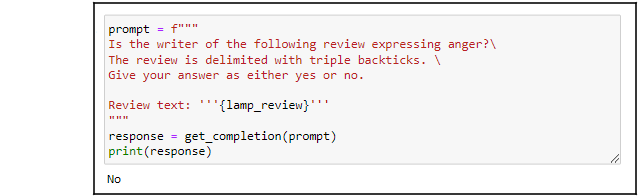


In this case, 
the customer is not angry. And notice that 
with supervised learning, if I had 
wanted to build all of these classifiers, there's no way 
I would have been able to do this with 
supervised learning in a few minutes 
that you saw me do so in this lesson. 

Try also if the customer is expressing delight or ask if 
there are any missing parts and see if you can a prompt 
to make different inferences about this lamp review. 
 

### <div class="alert alert-success" > Extract product and company name from customer reviews </div>
    
Let me show some more things that you 
can do with this system, specifically extracting 
richer information from a customer review. 
So, information extraction is the part of NLP, 
of Natural Language Processing, that relates to taking 
a piece of text and extracting certain things 
that you want to know from the text. 
    
    

So in this prompt, I'm 
asking it to identify the following items
 
- the item purchase
- the name of the company that made the item.

Again, if you are trying to 
summarize many reviews from an online shopping e-commerce website, 
it might be useful for your large collection of reviews 
to figure out what were the items, who made 
the item, figure out positive and negative 
sentiment, to track trends about positive or negative sentiment 
for specific items or for specific 
manufacturers.

In [8]:
prompt = f"""
Identify the following items from the review text: 
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Item" and "Brand" as the keys. 
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
  
Review text: '''{lamp_review}'''
"""
# response = get_completion(prompt)
# print(response)

And in this example, I'm going to 
ask it to format your response as a JSON object with "Item" and "Brand" as 
the keys. And so if I Run this prompt:

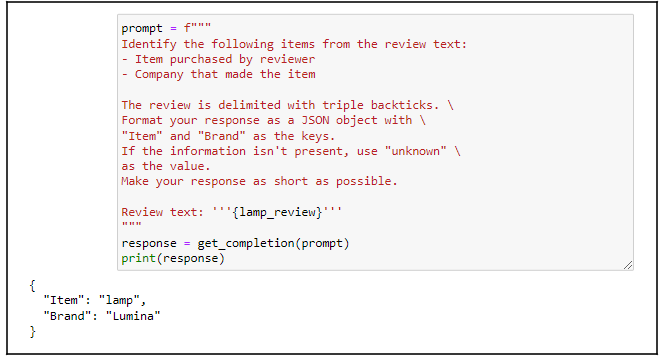

It says the 
item is a lamp, the brand is Lumina, and you can easily load this 
into the Python dictionary to then do additional processing 
on this output. 

### <div class="alert alert-success" >  Doing multiple tasks at once
    
 
In the above examples we've gone through, you 
saw how to write a prompt to recognize 
the sentiment, figure out if someone is angry, and then also extract 
the item and the brand. 

One way to extract all of the information 
would be to use three or four prompts and call "get_completion", 
you know, three times or four times 
to extract these different views one at a time. But 
it turns out you can actually write a 
single prompt to extract all of this information 
at the same time. 

So let's the prompt is: 

In [9]:
prompt = f"""
Identify the following items from the review text: 
- Sentiment (positive or negative)
- Is the reviewer expressing anger? (true or false)
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Sentiment", "Anger", "Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
Format the Anger value as a boolean.

Review text: '''{lamp_review}'''
"""
# response = get_completion(prompt)
# print(response)

in this prompt I'm also going 
to tell it to format the anger value as a 
boolean value, and let me run that.

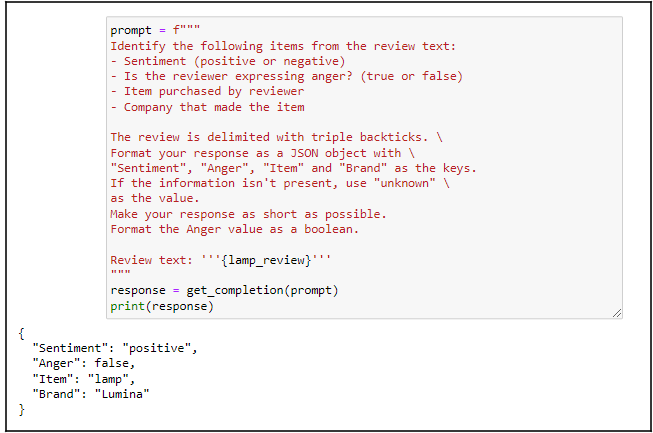

The output is a JSON where sentiment is positive, anger is false, and there are no quotes around false because it asked it to 
just output it as a boolean value. Extracted the item as "lamp with additional 
storage" instead of lamp, seems okay. 
But this way you can extract multiple fields 
out of a piece of text with just a single prompt. 

As usual, please feel free to play 
with different variations on this yourself. 
Or maybe even try typing in a totally 
different review to see if you can still 
extract these things accurately.

### <div class="alert alert-success" > Inferring topics
    
Now, one of the cool applications I've 
seen of large language models is inferring topics given 
a long piece of text. Here's a 
fictitious newspaper article about how government workers feel 
about the agency they work for. So, the recent 
survey conducted by government, and so on. 


In [10]:
story = """
In a recent survey conducted by the government, 
public sector employees were asked to rate their level 
of satisfaction with the department they work at. 
The results revealed that NASA was the most popular 
department with a satisfaction rating of 95%.

One NASA employee, John Smith, commented on the findings, 
stating, "I'm not surprised that NASA came out on top. 
It's a great place to work with amazing people and 
incredible opportunities. I'm proud to be a part of 
such an innovative organization."

The results were also welcomed by NASA's management team, 
with Director Tom Johnson stating, "We are thrilled to 
hear that our employees are satisfied with their work at NASA. 
We have a talented and dedicated team who work tirelessly 
to achieve our goals, and it's fantastic to see that their 
hard work is paying off."

The survey also revealed that the 
Social Security Administration had the lowest satisfaction 
rating, with only 45% of employees indicating they were 
satisfied with their job. The government has pledged to 
address the concerns raised by employees in the survey and 
work towards improving job satisfaction across all departments.
"""

### <div class="alert alert-success" >  Infer 5 topics
    
Given an article like this, we can ask it, with this prompt, to determine 
five topics that are being discussed in the 
following text.    

In [11]:
prompt = f"""
Determine five topics that are being discussed in the \
following text, which is delimited by triple backticks.

Make each item one or two words long. 

Format your response as a list of items separated by commas.

Text sample: '''{story}'''
"""
# response = get_completion(prompt)
# print(response)

And so, if we run that, you know, we get this article. It's about a 
government survey, it's about job satisfaction, it's about NASA, and so 
on.

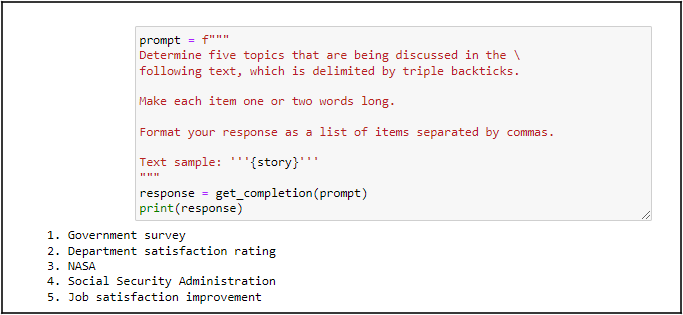

So, overall, I think, pretty nice extraction of a 
list of topics. And, of course, you can also, you know, 
split it so you get a Python list with the five topics that 
this article was about. 

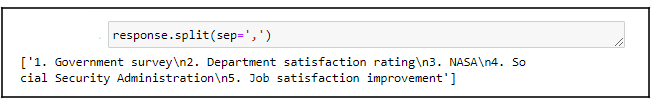

And if you have a collection of articles and extract 
topics, you can then also use a large language 
model to help you index into different topics. So, 
let me use a slightly different topic list. Let's 
say that we're a news website or something, and these are the topics we track:



In [ ]:
response.split(sep=',')

In [12]:
topic_list = [
    "nasa", "local government", "engineering", 
    "employee satisfaction", "federal government"
]

And let's say you want to figure out, given a news 
article, which of these topics are covered in that 
news article. 

So, here's a prompt that I can use:

In [13]:
prompt = f"""

Determine whether each item in the following list of \
topics is a topic in the text below, which
is delimited with triple backticks.

Give your answer as list with 0 or 1 for each topic.\

List of topics: {", ".join(topic_list)}

Text sample: '''{story}'''

"""
# response = get_completion(prompt)
# print(response)

The output for this prompt is:

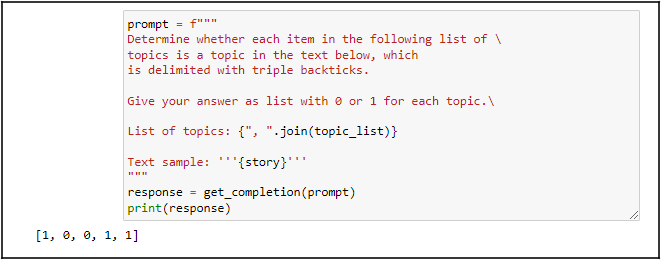

<b>[nasa, local government, engineering, employee satisfaction, federal government] = [1, 0, 0, 1, 1]</b>

So,
- It is about NASA. 
- It's not about local government. 
- It's not about engineering. 
- It is about employee satisfaction,
- It is about federal government.



So, with this, in machine learning, this is sometimes called a <b> "Zero-Shot Learning Algorithm" </b>, because we didn't give it any training data that was labeled, so that's Zero-Shot. And with just a prompt, it was able to determine which of these topics are covered in that news article. T

### <div class="alert alert-success" >  Make a news alert for certain topics
    
If you want to build a 
system that can take the prompt below, put it into a dictionary, 
and whenever NASA news pops up, print "ALERT: New NASA story!", they 
can use this to very quickly take any article, figure 
out what topics it is about, and if the topic includes NASA, 
have it print out "ALERT: New NASA story!". 
    
Oh, just one thing. I use this topic dictionary down here. This prompt that I use up 
here isn't very robust. If I wanted a production system, I 
would probably have it output the answer in JSON format, rather 
than as a list, because the output of the large language 
model can be a little bit inconsistent. So, this is actually a 
pretty brittle piece of code. But if 
you want, when you're done with this lesson, feel free to 
see if you can figure out how to modify this prompt, to have 
it output JSON instead of a list like this, and then 
have a more robust way to tell if a particular article is a story 
about NASA. 

In [14]:
prompt = f"""
Determine whether each item in the following list of \
topics is a topic in the text below, which
is delimited with triple backticks.

Give your answer as list with 0 or 1 for each topic.\

List of topics: {", ".join(topic_list)}

Text sample: '''{story}'''
"""
# response = get_completion(prompt)
# print(response)